In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import re

figure_path = '/home/weiss/git/thesis/doc/figures/'

Error tokenizing data. C error: Expected 1 fields in line 3, saw 2

Final RMSE:
 ml-1m      iter    rmse
298   299  0.9139
Final RMSE:
 ml-100k      iter    rmse
233   234  0.9311
Final RMSE:
 ml-100k      iter    rmse
298   299  0.8935
Final RMSE:
 ml-1m      iter   rmse
292   293  0.856


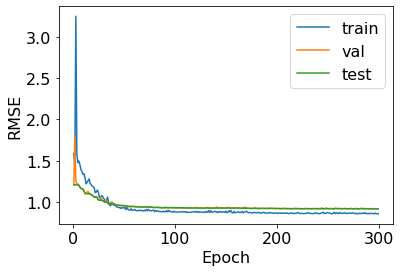

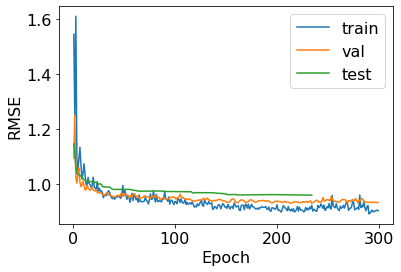

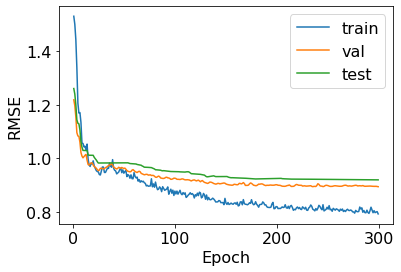

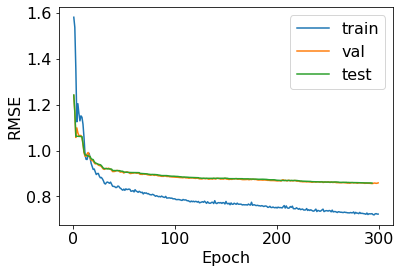

<Figure size 432x288 with 0 Axes>

In [36]:
dirs = next(os.walk('log'))[1]
dirs = ['log/' + d + '/' for d in dirs]

for d in dirs:
    try:
        #print(glob( d + 'train*'))
        train_loss = pd.read_csv(glob( d + 'train*')[0])
        val_loss = pd.read_csv(glob( d + 'val*')[0])
        test_loss = pd.read_csv(glob( d + 'test*')[0])

        model_name = re.findall(r"log/(.*)_.*", d)[0]

        plt.rcParams['font.size'] = 16
        plt.rcParams['axes.labelsize'] = 16
        plt.rcParams['xtick.labelsize'] = 16
        plt.rcParams['ytick.labelsize'] = 16
        plt.rcParams['legend.fontsize'] = 16
        plt.plot('iter', 'rmse', data=train_loss, label='train')
        plt.plot('iter', 'rmse', data=val_loss, label='val')
        plt.plot('iter', 'rmse', data=test_loss, label='test')

        #plt.title(f"Loss function over epochs ({model_name})")
        plt.xlabel("Epoch")
        plt.ylabel("RMSE")
        plt.legend()

        plt.show()
        print('Final RMSE:\n', model_name, val_loss[val_loss['rmse'] == val_loss['rmse'].min()])
        plt.savefig(figure_path + '/ml-' + model_name + '-loss.png', dpi=300, bbox_inches='tight')

    except Exception as e:
        print(e)